In [285]:
# Add environment Packages paths to conda
import os, sys, warnings
import pandas as pd
import numpy as np
warnings.simplefilter("ignore")

# Text preprocessing packages
import nltk # Text libarary
# nltk.download('stopwords')
import string # Removing special characters {#, @, ...}
import re # Regex Package
import regex
import emoji
# Corpora is a group presenting multiple collections of text documents. A single collection is called corpus.
from nltk.corpus import stopwords # Stopwords
import arabicstopwords.arabicstopwords as stp #more range of arabic stop words
from nltk.stem.isri import ISRIStemmer
import pyarabic.araby as araby
from tashaphyne.stemming import ArabicLightStemmer

from nltk.stem import SnowballStemmer, WordNetLemmatizer # Stemmer & Lemmatizer
#from gensim.utils import simple_preprocess  # Text ==> List of Tokens

# Text Embedding
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Modelling
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC
# Saving Model
import pickle

# Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
%matplotlib inline

In [286]:
data_2020 = pd.read_csv(r'DEV1\NADI2020-TWT.tsv', sep="\t")
data_2021 = pd.read_csv(r'DEV1\NADI2021-TWT.tsv', sep="\t")
data_2023 = pd.read_csv(r'DEV1\NADI2023_TWT.tsv', sep="\t")
data_2024_D1 = pd.read_csv(r'DEV1\NADI2024_subtask1_dev1.tsv', sep="\t")
data_2024_D2 = pd.read_csv(r'DEV2\NADI2024_subtask1_dev2.tsv', sep="\t")

In [287]:
data_2020.columns = ["id", "text", "label", "province"]

data_2020.head()

,id,text,label,province
0,TRAIN_1,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq,iq_Al-Anbar
1,TRAIN_2,ي دينيييي ربنا يستر,Egypt,eg_Alexandria
2,TRAIN_3,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq,iq_Maysan
3,TRAIN_4,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco,ma_Oriental
4,TRAIN_5,لأ ني حاضرها هذي لايف,Libya,ly_Al-Jabal-al-Akhdar


In [288]:
data_2021.columns = ["id", "text", "label", "province"]

data_2021.head()

,id,text,label,province
0,TRAIN_0,حاجة حلوة اكيد,Egypt,eg_Faiyum
1,TRAIN_1,عم بشتغلوا للشعب الاميركي اما نحن يكذبوا ويغشو...,Iraq,iq_Dihok
2,TRAIN_2,ابشر طال عمرك,Saudi_Arabia,sa_Ha'il
3,TRAIN_4,شهرين وتروح والباقي غير صيف ملينا,Algeria,dz_El-Oued
4,TRAIN_5,يابنتى والله ما حد متغاظ ولا مفروس منك ولا بيح...,Syria,sy_Damascus-City


In [289]:
data_2023.columns = ["id", "text", "label"]

data_2023.head()

,id,text,label
0,subtask1_train_1,USER روتلج علمود جنسيه,Iraq
1,subtask1_train_2,النت في عمان يذكرني ببطاقه الافق مال NUM ريالا...,Oman
2,subtask1_train_3,USER انا كنصراوي لاالوم اخواني النصراويه بتشجي...,Saudi_Arabia
3,subtask1_train_4,دوله اسرائيل قائمه علي ضعفنا يوم ما نتوحد ونقو...,Palestine
4,subtask1_train_5,USER لو تقابلنا بعد طول الغياب ضمني ما فيني حي...,Bahrain


Classes in **2020**, **2021** and **2023** are all the same, but in 2024 differs

In [290]:
data_2023.head()

,id,text,label
0,subtask1_train_1,USER روتلج علمود جنسيه,Iraq
1,subtask1_train_2,النت في عمان يذكرني ببطاقه الافق مال NUM ريالا...,Oman
2,subtask1_train_3,USER انا كنصراوي لاالوم اخواني النصراويه بتشجي...,Saudi_Arabia
3,subtask1_train_4,دوله اسرائيل قائمه علي ضعفنا يوم ما نتوحد ونقو...,Palestine
4,subtask1_train_5,USER لو تقابلنا بعد طول الغياب ضمني ما فيني حي...,Bahrain


In [291]:
data_2024_D1.head()

,sentence,Algeria,Egypt,Sudan,Tunisia
0,مش عارف ليه بفرح جدا لما اعرف ان حد من اصحابي ...,n,y,n,n
1,احمد فاروق جعفر لشيكابالا ترد تقول ايه علي تصر...,n,y,n,n
2,بدل ما انت طالع ونازل بالفيس تعال نگتب #يا_الل...,n,y,y,n
3,اللهم اهدني فيمن هديت وعافني فيمن عافيت وتولني...,y,y,y,y
4,اللهم انت ربي لا اله الا انت خلقتني وانا عبدك ...,y,y,y,y


Classes in **2024 D1** are `[Algeria, Egypt, Sudan, Tunisia]`

In [292]:
data_2024_D2.head()

,sentence,Algeria,Egypt,Jordan,Palestine,Sudan,Syria,Tunisia,Yemen
0,يوم ان ولد اللاش رزقه علي امه رزقي علي اللي مي...,n,n,n,n,n,n,n,n
1,في تونس يا انت مع الطحانه و الفساد و الخونه و ...,n,n,n,n,n,n,y,n
2,اللهم انت ربي لا اله الا انت خلقتني وانا عبدك ...,y,y,y,y,y,y,y,y
3,اربط الحزام وباتفتح قناه,n,n,n,n,n,n,n,y
4,بيعدي عليا بنات بحس ان مكتوب علي ضهرهم اتمني ل...,n,y,n,y,n,n,n,y


Classes in **2024 D2** are `[Algeria, Egypt, Jordan, Palestine, Sudan, Syria, Tunisia, Yemen]`

It's easy to integrate between 2020, 2021 and 2023 just by combining these two dataframes

but there's a little problem, 2023 data doesn't contain `Province` column

## 2020

### Rename each column in the data

In [293]:
data_2020.columns = ["id", "text", "label", "province"]

data_2020.head()

,id,text,label,province
0,TRAIN_1,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq,iq_Al-Anbar
1,TRAIN_2,ي دينيييي ربنا يستر,Egypt,eg_Alexandria
2,TRAIN_3,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq,iq_Maysan
3,TRAIN_4,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco,ma_Oriental
4,TRAIN_5,لأ ني حاضرها هذي لايف,Libya,ly_Al-Jabal-al-Akhdar


In [294]:
data_2020.shape

(20370, 4)

In [295]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20370 entries, 0 to 20369
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        20370 non-null  object
 1   text      20370 non-null  object
 2   label     20370 non-null  object
 3   province  20370 non-null  object
dtypes: object(4)
memory usage: 636.7+ KB


In [296]:
data_2020.label.value_counts()

label
Egypt           4473
Iraq            2556
Saudi_Arabia    2312
Algeria         1491
Oman            1098
UAE             1070
Syria           1070
Libya           1070
Morocco         1070
Yemen            851
Tunisia          750
Lebanon          639
Jordan           426
Palestine        420
Kuwait           420
Qatar            234
Bahrain          210
Sudan            210
Name: count, dtype: int64

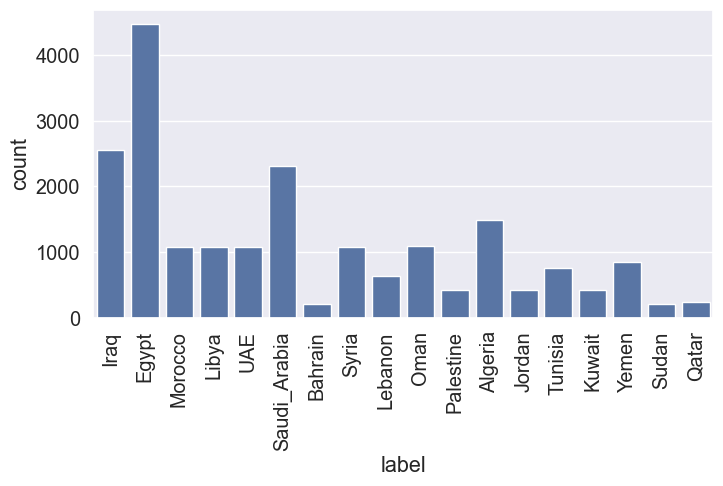

In [297]:
plt.figure(figsize=(8,4))
sns.countplot(x='label', data=data_2020)
plt.xticks(rotation=90);

In [298]:
data_2020.isna().sum()

id          0
text        0
label       0
province    0
dtype: int64

no null values

In [299]:
data_2020.duplicated().sum()

0

no duplicated records

In [300]:
arabic_stopwords = stopwords.words("arabic")

len(arabic_stopwords)

754

In [301]:
data_2020["stop_words"] = data_2020["text"].apply(lambda x: len(set(x.split()) & set(arabic_stopwords)))


data_2020.stop_words.value_counts()

stop_words
1     5613
0     5075
2     3699
3     2253
4     1415
5      907
6      521
7      335
8      202
9      127
10      93
11      55
12      33
13      19
14      10
15       8
16       2
17       2
18       1
Name: count, dtype: int64

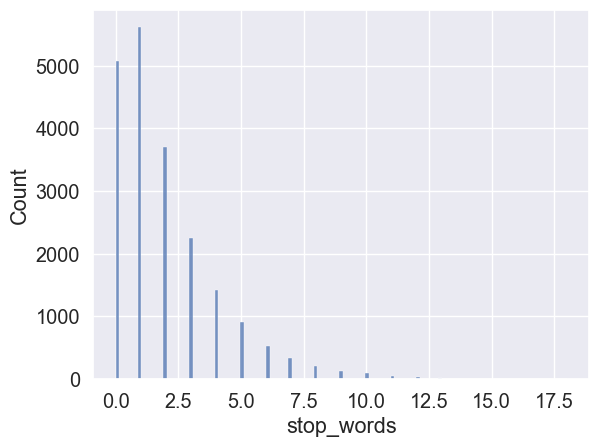

In [302]:
sns.histplot(data=data_2020, x="stop_words");

In [303]:
def emoji_counter(sentence):
    return emoji.emoji_count(sentence)

data_2020["emoji_count"] = data_2020['text'].apply(emoji_counter)

data_2020.emoji_count.value_counts()

emoji_count
0    20368
3        1
1        1
Name: count, dtype: int64

In [304]:
def remove_stop_words(text):
    Text=[i for i in str(text).split() if i not in arabic_stopwords]
    return " ".join(Text)

def ISRI_Stemmer(text):
    #making an object
    stemmer = ISRIStemmer()
    
    #stemming each word
    text = stemmer.stem(text)
    text = stemmer.pre32(text)
    text = stemmer.suf32(text)
    
    return text

def Snowball_stemmer(text):
    text = text.split()
    #making an object
    stemmer = SnowballStemmer("arabic")
    
    #stemming each word
    text=[stemmer.stem(y) for y in text]
    
    return " " .join(text)

def Arabic_Light_Stemmer(text):
    #making an object
    Arabic_Stemmer = ArabicLightStemmer()
    
    #stemming each word
    text=[Arabic_Stemmer.light_stem(y) for y in text.split()]
    
    return " " .join(text)

def normalizeArabic(text):
    text = text.strip()
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    
    #remove repetetions
    text = re.sub("[إأٱآا]", "ا", text)
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('ييي', 'ي')
    text = text.replace('اا', 'ا')

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    
    # Remove longation
    text = re.sub(r'(.)\1+', r"\1\1", text) 
    
    #Strip vowels from a text, include Shadda.
    text = araby.strip_tashkeel(text)
    
    #Strip diacritics from a text, include harakats and small lettres The striped marks are
    text = araby.strip_diacritics(text)
    text=''.join([i for i in text if not i.isdigit()])
    return text

def remove_non_arabic(text):
    text = re.sub('[A-Za-z]+',' ',text)
    return text

def remove_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def remove_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_emoji(string):
    
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string).strip()


def remove_extra_space(text):
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    return  " ".join(text.split())

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan
            
def space_between_emojis(s): 
    return ''.join((' '+c+' ') if c in emoji.UNICODE_EMOJI['en'] else c for c in s)

def remove_hashtages_and_mentions(text):
    text = re.sub("@[A-Za-z0-9_]+","", text)
    text = re.sub("#[A-Za-z0-9_]+","", text)
    return text

def remove_tags(text): # remove html tags
    pattern = re.compile(r'<.*?>')     
    return pattern.sub('', text)

def combine_all(text):
    text = remove_stop_words(text)
    text = ISRI_Stemmer(text)
    text = Snowball_stemmer(text)
    text = Arabic_Light_Stemmer(text)
    text = normalizeArabic(text)
    text = remove_non_arabic(text)
    text = remove_numbers(text)
    text = remove_punctuations(text)
    text = remove_urls(text)
    text = remove_emoji(text)
    text = remove_extra_space(text)
    text = remove_hashtages_and_mentions(text)
    text = remove_tags(text)
    return text


In [305]:
data_2020 = data_2020.drop(columns=['id', 'province'])

In [306]:
data_2020.head()

,text,label,stop_words,emoji_count
0,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq,0,0
1,ي دينيييي ربنا يستر,Egypt,1,0
2,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq,1,0
3,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco,3,0
4,لأ ني حاضرها هذي لايف,Libya,1,0


In [307]:
data_2020['cleaned'] = data_2020["text"]

In [308]:
data_2020['cleaned'] = data_2020['cleaned'].apply(remove_stop_words)

data_2020.head()

,text,label,stop_words,emoji_count,cleaned
0,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq,0,0,الفار العور يشوف فقط كيسي ومايشوف ماتويد
1,ي دينيييي ربنا يستر,Egypt,1,0,دينيييي ربنا يستر
2,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq,1,0,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم و...
3,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco,3,0,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ حَبِيب بَعْض ...
4,لأ ني حاضرها هذي لايف,Libya,1,0,لأ ني حاضرها لايف


In [309]:
data_2020['cleaned'] = data_2020['cleaned'].apply(ISRI_Stemmer)

data_2020.head()

,text,label,stop_words,emoji_count,cleaned
0,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq,0,0,فار العور يشوف فقط كيسي ومايشوف ماتويد
1,ي دينيييي ربنا يستر,Egypt,1,0,دينيييي ربنا يستر
2,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq,1,0,اساسا نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم وه...
3,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco,3,0,ليست كل المشاعر تحتاج حبيب بعض المشاعر تحتاج ر...
4,لأ ني حاضرها هذي لايف,Libya,1,0,لأ ني حاضرها لايف


In [310]:
data_2020['cleaned'] = data_2020['cleaned'].apply(Snowball_stemmer)

data_2020.head()

,text,label,stop_words,emoji_count,cleaned
0,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq,0,0,فار عور يشوف فقط كيس مايشوف ماتويد
1,ي دينيييي ربنا يستر,Egypt,1,0,دين ربن يستر
2,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq,1,0,اساس نسب قذر نجس لاش تتفاخر نجاس هابيهhttps://...
3,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco,3,0,ليس كل مشاعر تحتاج حبيب بعض مشاعر تحتاج رفيق ي...
4,لأ ني حاضرها هذي لايف,Libya,1,0,لأ ني حاضر لايف


In [311]:
data_2020['cleaned'] = data_2020['cleaned'].apply(Arabic_Light_Stemmer)

data_2020.head()

,text,label,stop_words,emoji_count,cleaned
0,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq,0,0,ار عور شوف قط يس مايشوف ماتويد
1,ي دينيييي ربنا يستر,Egypt,1,0,دي رب ستر
2,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq,1,0,ساس سب قذر جس اش تفاخر جاس هابيهhttps://twitte...
3,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco,3,0,ليس كل مشاعر حتاج حبيب بعض مشاعر حتاج رفيق خذل...
4,لأ ني حاضرها هذي لايف,Libya,1,0,لأ ني حاضر ايف


In [312]:
data_2020['cleaned'] = data_2020['cleaned'].apply(normalizeArabic)

data_2020.head()

,text,label,stop_words,emoji_count,cleaned
0,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq,0,0,ار عور شوف قط يس مايشوف ماتويد
1,ي دينيييي ربنا يستر,Egypt,1,0,دي رب ستر
2,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq,1,0,ساس سب قذر جس اش تفاخر جاس هابيهhttps://twitte...
3,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco,3,0,ليس كل مشاعر حتاج حبيب بعض مشاعر حتاج رفيق خذل...
4,لأ ني حاضرها هذي لايف,Libya,1,0,لا ني حاضر ايف


In [313]:
data_2020['cleaned'] = data_2020['cleaned'].apply(remove_non_arabic)

data_2020.head()

,text,label,stop_words,emoji_count,cleaned
0,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq,0,0,ار عور شوف قط يس مايشوف ماتويد
1,ي دينيييي ربنا يستر,Egypt,1,0,دي رب ستر
2,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq,1,0,ساس سب قذر جس اش تفاخر جاس هابيه :// . / _ / / …
3,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco,3,0,ليس كل مشاعر حتاج حبيب بعض مشاعر حتاج رفيق خذل...
4,لأ ني حاضرها هذي لايف,Libya,1,0,لا ني حاضر ايف


In [314]:
data_2020['cleaned'] = data_2020['cleaned'].apply(remove_numbers)

data_2020.head()

,text,label,stop_words,emoji_count,cleaned
0,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq,0,0,ار عور شوف قط يس مايشوف ماتويد
1,ي دينيييي ربنا يستر,Egypt,1,0,دي رب ستر
2,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq,1,0,ساس سب قذر جس اش تفاخر جاس هابيه :// . / _ / / …
3,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco,3,0,ليس كل مشاعر حتاج حبيب بعض مشاعر حتاج رفيق خذل...
4,لأ ني حاضرها هذي لايف,Libya,1,0,لا ني حاضر ايف


In [315]:
data_2020['cleaned'] = data_2020['cleaned'].apply(remove_punctuations)

data_2020.head()

,text,label,stop_words,emoji_count,cleaned
0,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq,0,0,ار عور شوف قط يس مايشوف ماتويد
1,ي دينيييي ربنا يستر,Egypt,1,0,دي رب ستر
2,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq,1,0,ساس سب قذر جس اش تفاخر جاس هابيه …
3,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco,3,0,ليس كل مشاعر حتاج حبيب بعض مشاعر حتاج رفيق خذل...
4,لأ ني حاضرها هذي لايف,Libya,1,0,لا ني حاضر ايف


In [316]:
data_2020['cleaned'] = data_2020['cleaned'].apply(remove_urls)

data_2020.head()

,text,label,stop_words,emoji_count,cleaned
0,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq,0,0,ار عور شوف قط يس مايشوف ماتويد
1,ي دينيييي ربنا يستر,Egypt,1,0,دي رب ستر
2,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq,1,0,ساس سب قذر جس اش تفاخر جاس هابيه …
3,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco,3,0,ليس كل مشاعر حتاج حبيب بعض مشاعر حتاج رفيق خذل...
4,لأ ني حاضرها هذي لايف,Libya,1,0,لا ني حاضر ايف


In [317]:
data_2020['cleaned'] = data_2020['cleaned'].apply(remove_emoji)

data_2020.head()

,text,label,stop_words,emoji_count,cleaned
0,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq,0,0,ار عور شوف قط يس مايشوف ماتويد
1,ي دينيييي ربنا يستر,Egypt,1,0,دي رب ستر
2,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq,1,0,ساس سب قذر جس اش تفاخر جاس هابيه …
3,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco,3,0,ليس كل مشاعر حتاج حبيب بعض مشاعر حتاج رفيق خذل...
4,لأ ني حاضرها هذي لايف,Libya,1,0,لا ني حاضر ايف


In [318]:
data_2020['cleaned'] = data_2020['cleaned'].apply(remove_extra_space)

data_2020.head()

,text,label,stop_words,emoji_count,cleaned
0,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq,0,0,ار عور شوف قط يس مايشوف ماتويد
1,ي دينيييي ربنا يستر,Egypt,1,0,دي رب ستر
2,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq,1,0,ساس سب قذر جس اش تفاخر جاس هابيه …
3,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco,3,0,ليس كل مشاعر حتاج حبيب بعض مشاعر حتاج رفيق خذل...
4,لأ ني حاضرها هذي لايف,Libya,1,0,لا ني حاضر ايف


In [319]:
data_2020['cleaned'] = data_2020['cleaned'].apply(remove_hashtages_and_mentions)

data_2020.head()

,text,label,stop_words,emoji_count,cleaned
0,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq,0,0,ار عور شوف قط يس مايشوف ماتويد
1,ي دينيييي ربنا يستر,Egypt,1,0,دي رب ستر
2,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq,1,0,ساس سب قذر جس اش تفاخر جاس هابيه …
3,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco,3,0,ليس كل مشاعر حتاج حبيب بعض مشاعر حتاج رفيق خذل...
4,لأ ني حاضرها هذي لايف,Libya,1,0,لا ني حاضر ايف


In [320]:
data_2020['cleaned'] = data_2020['cleaned'].apply(remove_tags)

In [321]:
data_2020 = data_2020[['text', 'label', 'cleaned']]

data_2020.head()

,text,label,cleaned
0,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq,ار عور شوف قط يس مايشوف ماتويد
1,ي دينيييي ربنا يستر,Egypt,دي رب ستر
2,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq,ساس سب قذر جس اش تفاخر جاس هابيه …
3,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco,ليس كل مشاعر حتاج حبيب بعض مشاعر حتاج رفيق خذل...
4,لأ ني حاضرها هذي لايف,Libya,لا ني حاضر ايف


In [322]:
data_2021 = data_2021.drop(columns=['id', 'province'])

In [323]:
data_2021['cleaned'] = data_2021['text']

In [324]:
data_2021['cleaned'] = data_2021['cleaned'].apply(combine_all)

In [325]:
data_2021.head()

,text,label,cleaned
0,حاجة حلوة اكيد,Egypt,حاج حل كيد
1,عم بشتغلوا للشعب الاميركي اما نحن يكذبوا ويغشو...,Iraq,عم شتغل شعب مير ما كذب غش سرق قتل شعوب عمل صال...
2,ابشر طال عمرك,Saudi_Arabia,بشر طال عمر
3,شهرين وتروح والباقي غير صيف ملينا,Algeria,شهر روح اق صيف مل
4,يابنتى والله ما حد متغاظ ولا مفروس منك ولا بيح...,Syria,يابنتي لل حد متغاظ مفروس من حسد نتي عر اساسا


In [326]:
data_2023 = data_2023.drop(columns=['id'])

In [327]:
data_2023['cleaned'] = data_2023['text']

In [328]:
data_2023['cleaned'] = data_2023['cleaned'].apply(combine_all)

In [329]:
data_2023.head()

,text,label,cleaned
0,USER روتلج علمود جنسيه,Iraq,روتلج علمود جنس
1,النت في عمان يذكرني ببطاقه الافق مال NUM ريالا...,Oman,نت عما ذكر طاق فق مال ريال نورس عم
2,USER انا كنصراوي لاالوم اخواني النصراويه بتشجي...,Saudi_Arabia,نا صرا الوم خو نصراو شجيع ور ضد هلال ان دايم ج...
3,دوله اسرائيل قائمه علي ضعفنا يوم ما نتوحد ونقو...,Palestine,دول اسرايل قايم عل ضعف وم توحد قو رح تحرر سهول...
4,USER لو تقابلنا بعد طول الغياب ضمني ما فيني حي...,Bahrain,قابل طول غياب ضمن ين حيل عاتب


In [330]:
cleaned_data = pd.concat([data_2020,data_2021,data_2023])

cleaned_data.head()

,text,label,cleaned
0,الفار العور يشوف فقط كيسي ومايشوف ماتويد,Iraq,ار عور شوف قط يس مايشوف ماتويد
1,ي دينيييي ربنا يستر,Egypt,دي رب ستر
2,أساساً نسبكم قذر ونجس بلاش تتفاخروا بنجاستكم ي...,Iraq,ساس سب قذر جس اش تفاخر جاس هابيه …
3,ليْسَت كُل المَشَاعِرِ تَحْتَاجُ إلى حَبِيب بَ...,Morocco,ليس كل مشاعر حتاج حبيب بعض مشاعر حتاج رفيق خذل...
4,لأ ني حاضرها هذي لايف,Libya,لا ني حاضر ايف


In [331]:
def train_model(model, data, targets):
    text_clf = Pipeline([('vect',TfidfVectorizer()),
                         ('clf', model)])
    text_clf.fit(data, targets)
    return text_clf

def get_F1(trained_model,X,y):
    predicted=trained_model.predict(X)
    f1=f1_score(y,predicted, average=None)
    return f1

In [332]:
models = {
    "LR" : LogisticRegression(random_state = 0),
    "DT" : DecisionTreeClassifier(random_state = 0),
    "SVC" : SVC(random_state = 0),
    "RF" : RandomForestClassifier(random_state = 0),
}

In [333]:
X = cleaned_data.text.values
y = cleaned_data.label.values

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,shuffle=True, random_state=42)

accuracy = {}

In [335]:
LR_model = train_model(models["LR"], X_train, y_train)

y_pred = LR_model.predict(X_test)

accuracy["LR"] = accuracy_score(y_test, y_pred)

In [336]:
DT_model = train_model(models["DT"], X_train, y_train)

y_pred = DT_model.predict(X_test)

accuracy["DT"] = accuracy_score(y_test, y_pred)

In [337]:
SVC_model = train_model(models["SVC"], X_train, y_train)

y_pred = SVC_model.predict(X_test)

accuracy["SVC"] = accuracy_score(y_test, y_pred)

In [338]:
RF_model = train_model(models["RF"], X_train, y_train)

y_pred = RF_model.predict(X_test)

accuracy["RF"] = accuracy_score(y_test, y_pred)

In [339]:
for i, j in accuracy.items():
    print("{0} : {1}".format(i, round(j*100)))

LR : 45
DT : 26
SVC : 42
RF : 38
